In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('HuGaDB_v2_various_01_00.csv')

# Remoção manual de atributos irrelevantes para análise do movimento humano

df = df.drop(df.columns[0], axis=1)
df = df.drop(['EMG_right', 'EMG_left'], axis=1)

print(df.info())
print(df.describe())
print(df['activity'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2435 entries, 0 to 2434
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   accelerometer_right_foot_x   2435 non-null   int64 
 1   accelerometer_right_foot_y   2435 non-null   int64 
 2   accelerometer_right_foot_z   2435 non-null   int64 
 3   gyroscope_right_foot_x       2435 non-null   int64 
 4   gyroscope_right_foot_y       2435 non-null   int64 
 5   gyroscope_right_foot_z       2435 non-null   int64 
 6   accelerometer_right_shin_x   2435 non-null   int64 
 7   accelerometer_right_shin_y   2435 non-null   int64 
 8   accelerometer_right_shin_z   2435 non-null   int64 
 9   gyroscope_right_shin_x       2435 non-null   int64 
 10  gyroscope_right_shin_y       2435 non-null   int64 
 11  gyroscope_right_shin_z       2435 non-null   int64 
 12  accelerometer_right_thigh_x  2435 non-null   int64 
 13  accelerometer_right_thigh_y  2435

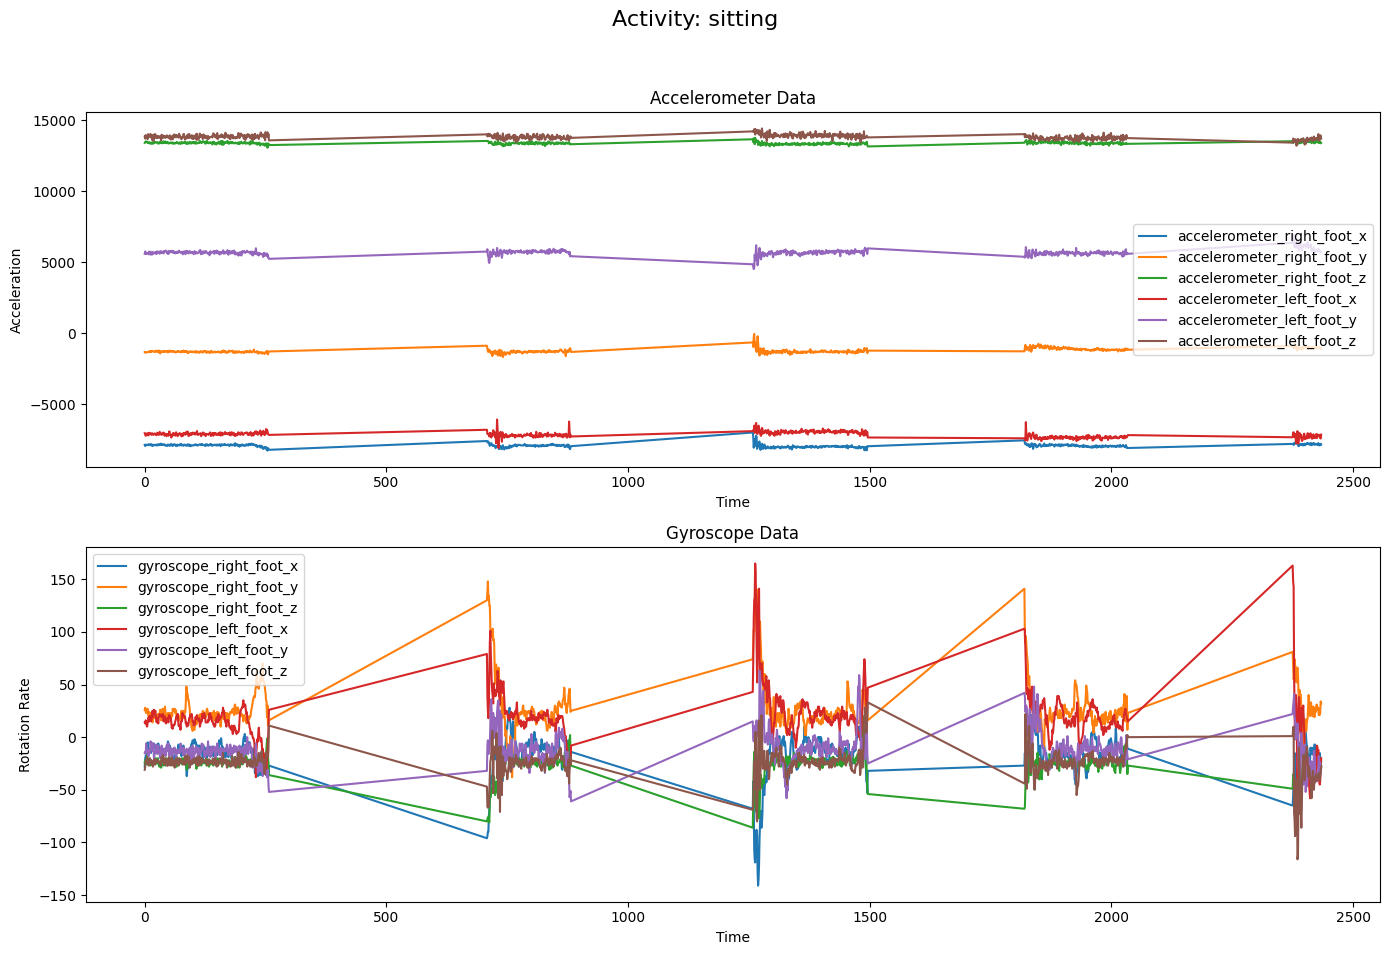

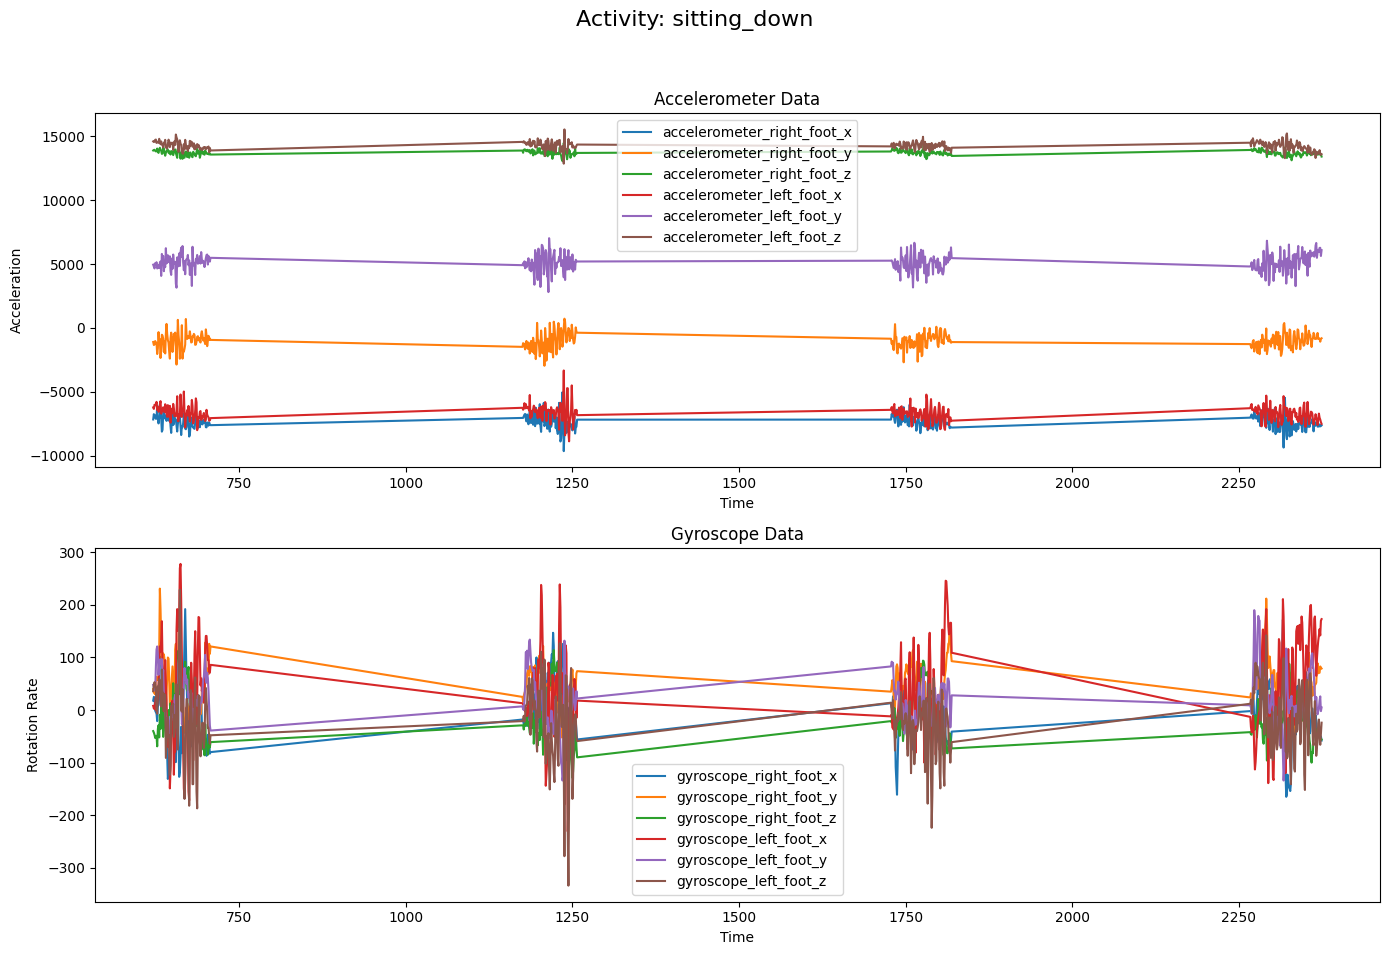

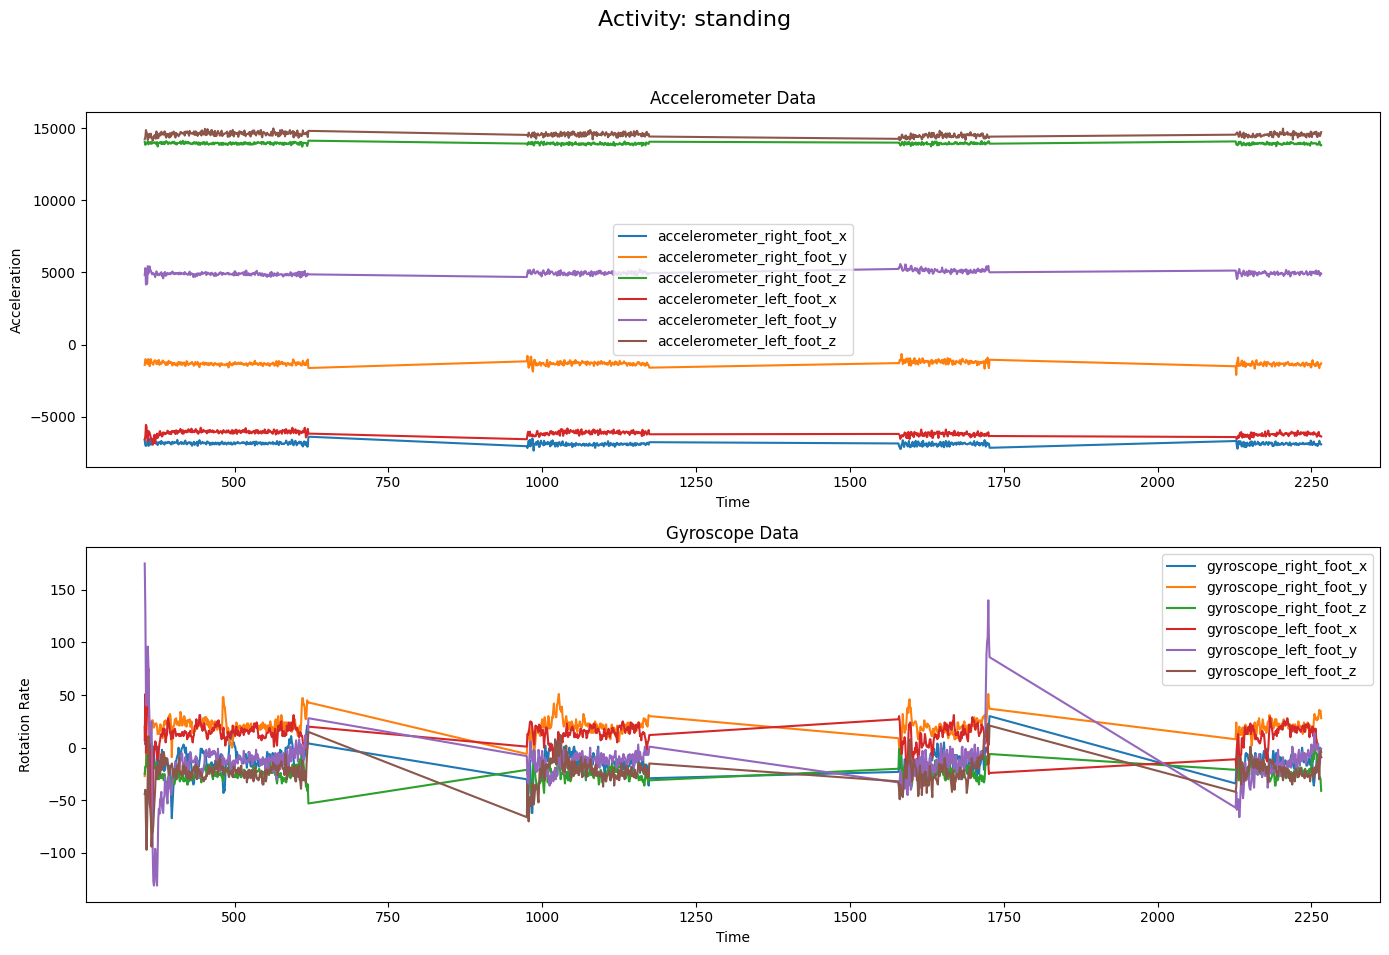

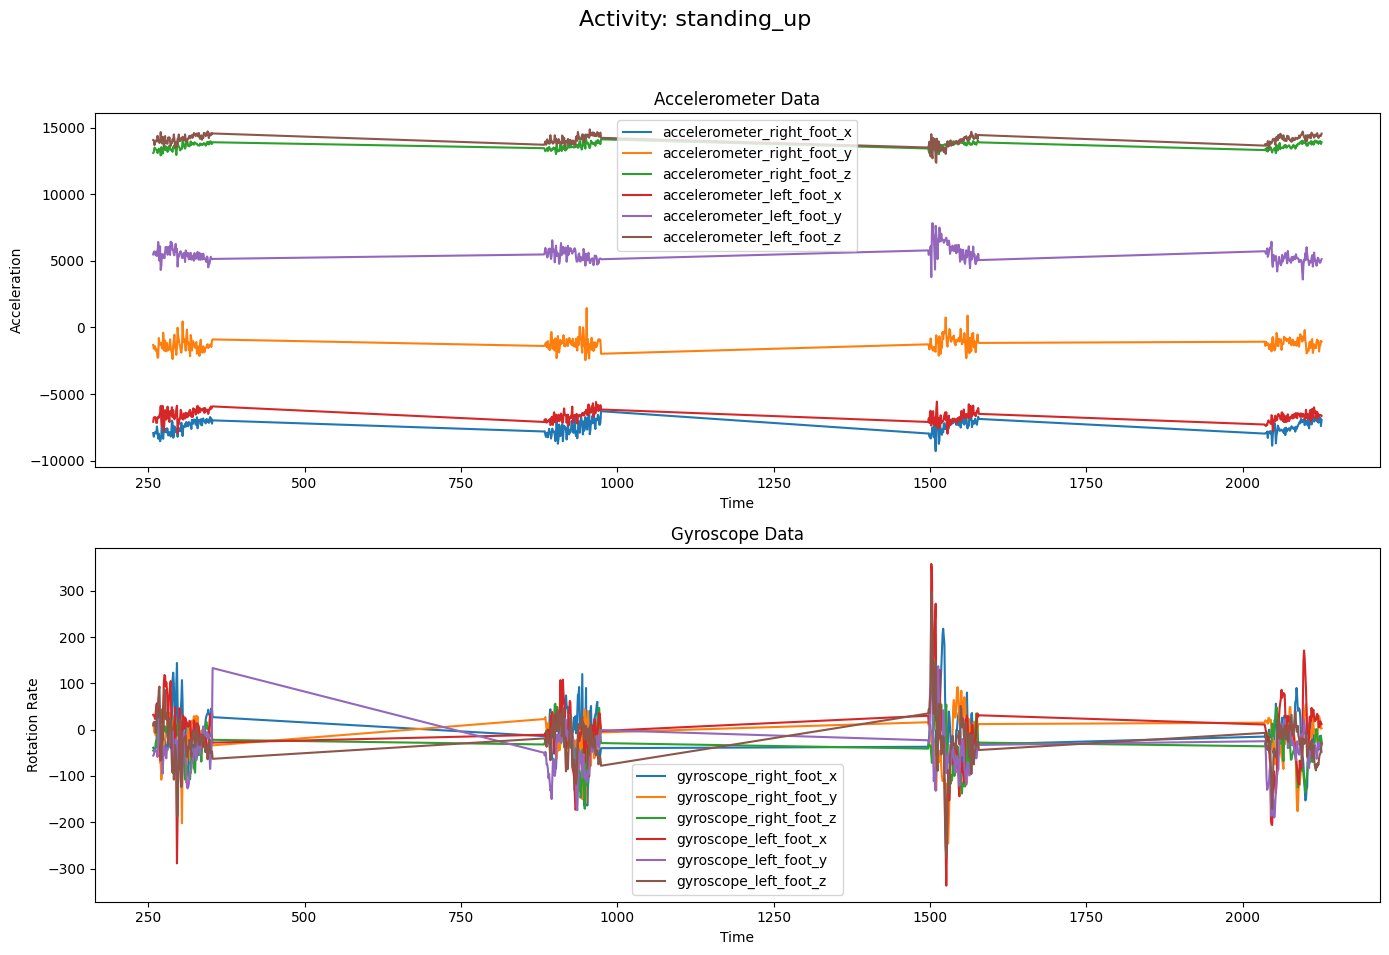

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Agrupar de acordo com o atributo activity
grouped = df.groupby('activity')

columns = df.columns.tolist()

# Selecionar conjunto dos dispositivos a serem analisados
foot = 0
shin = 6
thigh = 12


var = foot


# Gráfico de cada grupo
for activity, group in grouped:
    plt.figure(figsize=(14, 10))
    plt.suptitle(f'Activity: {activity}', fontsize=16)

    plt.subplot(2, 1, 1)
    plt.plot(group.index, group[[columns[var], columns[var + 1], columns[var + 2]]], label=[columns[var], columns[var + 1], columns[var + 2]])
    plt.plot(group.index, group[[columns[var + 18], columns[var + 19], columns[var + 20]]], label=[columns[var + 18], columns[var + 19], columns[var + 20]])
    plt.title('Accelerometer Data')
    plt.xlabel('Time')
    plt.ylabel('Acceleration')
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(group.index, group[[columns[var + 3], columns[var + 4], columns[var + 5]]], label=[columns[var + 3], columns[var + 4], columns[var + 5]])
    plt.plot(group.index, group[[columns[var + 21], columns[var + 22], columns[var + 23]]], label=[columns[var + 21], columns[var + 22], columns[var + 23]])
    plt.title('Gyroscope Data')
    plt.xlabel('Time')
    plt.ylabel('Rotation Rate')
    plt.legend()

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

In [71]:
import numpy as np
import pandas as pd
from ahrs.filters import Complementary

# Inicialização do filtro complementar
cf = Complementary(frequency=100, gain = 1)

# Orientação do quaternion assumindo o início sem rotação
orientation = np.array([1.0, 0.0, 0.0, 0.0]) 

orientations = []

"""     plt.plot(group.index, group[[columns[var], columns[var + 1], columns[var + 2]]], label=[columns[var], columns[var + 1], columns[var + 2]])
    plt.plot(group.index, group[[columns[var + 18], columns[var + 19], columns[var + 20]]], label=[columns[var + 18], columns[var + 19], columns[var + 20]])
    plt.title('Accelerometer Data')
    plt.xlabel('Time')
    plt.ylabel('Acceleration')
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(group.index, group[[columns[var + 3], columns[var + 4], columns[var + 5]]], label=[columns[var + 3], columns[var + 4], columns[var + 5]])
    plt.plot(group.index, group[[columns[var + 21], columns[var + 22], columns[var + 23]]], label=[columns[var + 21], columns[var + 22], columns[var + 23]])
 """

# Iteração sobre todas as linhas do df
for i in range(len(df) - 1):
    
    # Coleta de dados de aceleração e gyroscópio, seguindo lógica parecida com o código do gráfico
    acc = np.array([df.iloc[i, var], df.iloc[i, var + 1], df.iloc[i, var + 2]])
    gyro = np.array([df.iloc[i, var + 3], df.iloc[i, var + 4], df.iloc[i, var + 5]])
    
    # Atualização da orientação utilizando o filtro complementar da biblioteca
    orientation = cf.update(orientation, gyr=gyro, acc=acc)
     
    orientations.append(orientation) 

orientation_df = pd.DataFrame(orientations, columns=['q0', 'q1', 'q2', 'q3'])

print(df.columns[0])

print(orientation_df)
print(orientation_df.describe())

accelerometer_right_foot_x
            q0        q1        q2        q3
0     0.964062 -0.047940  0.260994  0.012979
1     0.963660 -0.049384  0.262183  0.013436
2     0.964273 -0.048051  0.260192  0.012966
3     0.964577 -0.048166  0.259043  0.012935
4     0.964008 -0.048508  0.261081  0.013137
...        ...       ...       ...       ...
2429  0.964195 -0.038638  0.262156  0.010505
2430  0.964801 -0.036372  0.260270  0.009812
2431  0.964626 -0.037199  0.260791  0.010057
2432  0.964487 -0.037262  0.261294  0.010095
2433  0.964752 -0.040057  0.259871  0.010790

[2434 rows x 4 columns]
                q0           q1           q2           q3
count  2434.000000  2434.000000  2434.000000  2434.000000
mean      0.967990    -0.043004     0.245988     0.010905
std       0.004589     0.012371     0.018256     0.003192
min       0.952379    -0.104522     0.181532    -0.012959
25%       0.963770    -0.048231     0.227288     0.009848
50%       0.967294    -0.045325     0.250021     0.011113
75